In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Spotify Tracks

In [4]:
spotify_tracks = pd.read_csv('D3/tracks.csv')
print(spotify_tracks.shape)
spotify_tracks.head()

(232725, 18)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Data Exploration & Cleaning

In [27]:
spotify_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63851 entries, 0 to 63850
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       63851 non-null  object 
 1   track_id          63851 non-null  object 
 2   track_name        63851 non-null  object 
 3   acousticness      63851 non-null  float64
 4   danceability      63851 non-null  float64
 5   duration_ms       63851 non-null  int64  
 6   energy            63851 non-null  float64
 7   instrumentalness  63851 non-null  float64
 8   key               63851 non-null  int64  
 9   liveness          63851 non-null  float64
 10  loudness          63851 non-null  float64
 11  mode              63851 non-null  int64  
 12  speechiness       63851 non-null  float64
 13  tempo             63851 non-null  float64
 14  time_signature    63851 non-null  int64  
 15  valence           63851 non-null  float64
 16  popularity        63851 non-null  int64 

In [5]:
spotify_tracks.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


We note that there are a few non-null values in the name column.

In [95]:
clean_df = spotify_tracks.dropna(subset=['name']).reset_index(drop=True)
clean_df.shape

(586601, 20)

Change the type of the release_date column to be of datetime format.

In [96]:
clean_df['release_date']= pd.to_datetime(clean_df['release_date'])

Drop duplicates with same name and artist.


In [97]:
clean_df = clean_df.drop_duplicates(
    subset = ['name', 'artists'],
    keep = 'last').reset_index(drop = True)

print(clean_df.shape)

(526609, 20)


Remove songs older than the 90s, as is the project scope.

In [98]:
clean_df = clean_df[clean_df['release_date'].dt.year >= 1990]

Change song duration to be more easy to read and understand (ms -> minutes)

In [99]:
clean_df['duration_ms'] = clean_df['duration_ms']/60000

In [100]:
clean_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
32523,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,2.669783,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3
32529,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,2.659333,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4
32534,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,2.366450,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4
32541,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,3.122217,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3
32544,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,25,3.946667,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.269,0.129,7,-18.168,0,0.0576,0.938,0.000005,0.683,0.160,82.332,3


Currently the data is hard to read. Let's rearrange the columns.

In [101]:
clean_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [102]:
clean_df = clean_df[['id',
                'id_artists',
                'name',
                'artists',
                'release_date',
                'duration_ms',
                'explicit',
                'mode',
                'time_signature',
                'key',
                'acousticness',
                'instrumentalness',
                'liveness',
                'danceability',
                'energy',
                'loudness',
                'speechiness',
                'valence',
                'tempo',
                'popularity',
]]

Let's give removing non-english title songs a go (as per project scope).

In [103]:
print('before',clean_df.shape)

# remove nonlatin chars
clean_df['name'] = clean_df['name'].str.encode('ascii', 'ignore').str.decode('ascii')

# remove empty rows
clean_df = clean_df[clean_df["name"] != " "]
clean_df = clean_df[clean_df["name"] != ""]

print('after', clean_df.shape)

before (290787, 20)
after (265936, 20)


In [104]:
clean_df = clean_df.reset_index(drop=True)
clean_df

,id,id_artists,name,artists,release_date,duration_ms,explicit,mode,time_signature,key,acousticness,instrumentalness,liveness,danceability,energy,loudness,speechiness,valence,tempo,popularity
0,6catF1lDhNTjjGa2GxRQNN,['3UmBeGyNwr4iDWi1vTxWi8'],You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],2008-02-11,2.669783,0,1,3,0,0.394,0.000000,0.1490,0.484,0.265,-11.101,0.0322,0.2850,113.564,56
1,6Pkt6qVikqPBt9bEQy8iTz,['6lH5PpuiMa5SpfjoIOlwCS'],A Lover's Concerto,['The Toys'],2020-03-13,2.659333,0,1,4,2,0.436,0.000000,0.1390,0.671,0.867,-2.706,0.0571,0.8390,120.689,41
2,4aSw1QJIMwYSoDEgzgdCJL,['3UmBeGyNwr4iDWi1vTxWi8'],Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],2008-02-11,2.366450,0,0,4,6,0.255,0.000005,0.1630,0.405,0.365,-10.226,0.0289,0.5880,104.536,40
3,1hx7X9cMXHWJjknb9O6Ava,['1Mxqyy3pSjf8kZZL4QVxS0'],The September Of My Years - Live At The Sands ...,['Frank Sinatra'],2018-05-04,3.122217,0,1,3,7,0.887,0.000000,0.9040,0.319,0.201,-17.796,0.0623,0.2390,117.153,26
4,19oquvXf3bc65GSqtPYA5S,['1Mxqyy3pSjf8kZZL4QVxS0'],It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],2018-05-04,3.946667,0,0,3,7,0.938,0.000005,0.6830,0.269,0.129,-18.168,0.0576,0.1600,82.332,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265931,1ZwZsVZUiyFwIHMNpI3ERt,['4USdOnfLczwUglA3TrdHs2'],Skyscraper,['Emilie Chin'],2020-02-08,1.766700,0,0,4,5,0.113,0.856000,0.1040,0.626,0.530,-13.117,0.0284,0.2150,120.113,4
265932,0NuWgxEp51CutD2pJoF4OM,['1dy5WNgIKQU6ezkpZs4y8z'],blind,['ROLE MODEL'],2020-10-21,2.554883,0,1,4,0,0.141,0.000297,0.0924,0.765,0.663,-5.223,0.0652,0.6860,150.091,72
265933,27Y1N4Q4U3EfDU5Ubw8ws2,['37M5pPGs6V1fchFJSgCguX'],What They'll Say About Us,['FINNEAS'],2020-09-02,3.126683,0,0,4,7,0.895,0.000150,0.0874,0.535,0.314,-12.823,0.0408,0.0663,145.095,70
265934,45XJsGpFTyzbzeWK8VzR8S,"['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",A Day At A Time,"['Gentle Bones', 'Clara Benin']",2021-03-05,2.366717,0,1,4,10,0.206,0.000003,0.3050,0.696,0.615,-6.212,0.0345,0.4380,90.029,58


We can see there are still non-english song titles ('Mar de Emociones'). This will be taken care of later on with a dedicated function.

^ !!!! ran the func, 35 min and only remained with 70k songs. not sure if bad dataset or just fine. Let's decide whether to keep them or not as the model performs? maybe it doesn't even matter (billboard won't have most of those if correct)

## Analyse numerical features

### duration_ms

In [105]:
clean_df['duration_ms']

0         2.669783
1         2.659333
2         2.366450
3         3.122217
4         3.946667
            ...   
265931    1.766700
265932    2.554883
265933    3.126683
265934    2.366717
265935    3.572667
Name: duration_ms, Length: 265936, dtype: float64

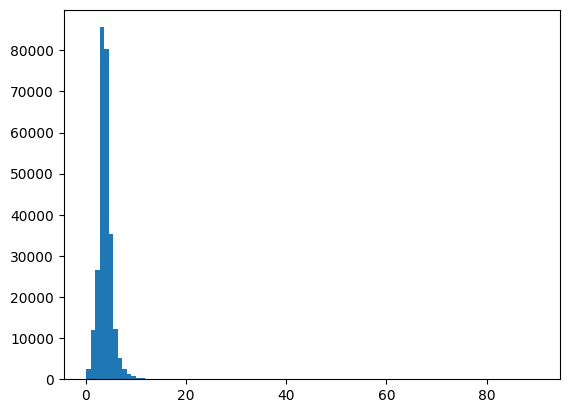

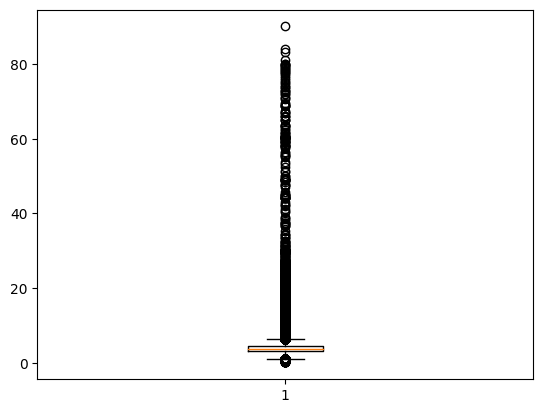

In [106]:
plt.hist(clean_df['duration_ms'], bins=100)
plt.show()

plt.boxplot(clean_df['duration_ms'])
plt.show()

In [107]:
clean_df[clean_df['duration_ms']>50]

,id,id_artists,name,artists,release_date,duration_ms,explicit,mode,time_signature,key,acousticness,instrumentalness,liveness,danceability,energy,loudness,speechiness,valence,tempo,popularity
12165,0LfoartMBLZIQ4AHWBYdob,['0LyfQWJT6nXafLPZqxe9Of'],The Best of Chillifunk Ten Years 1996-2006 (No...,['Various Artists'],1996-01-01,72.800000,0,1,4,1,0.006100,0.18300,0.044,0.753,0.829000,-6.797,0.0417,0.721,127.280,0
14078,5EvdM8FjgviSxQCb2FuH1d,['0rhY5SJ2Re04pDcAbGKgo9'],Happy New Year Mix 2009,['Dj Emma'],2009-12-25,78.278167,0,0,4,6,0.000599,0.83800,0.093,0.792,0.742000,-6.899,0.0520,0.227,128.001,1
14787,3bhMyYMXkK89VAIB52rtjA,['14D23I203ITLC95b5ndqEh'],2010 the Year of the Open Door,['Bishop Norman L. Wagner'],2010-01-03,70.582450,0,1,3,1,0.584000,0.00000,0.582,0.518,0.348000,-22.459,0.9140,0.086,54.613,0
14803,6aFQ4Zu4dvTfWFbXVHifcD,['0ruxrxTRHzfO8KsLLNPNkK'],"Robsoul 15 Years, Vol. 3 (2010-2014) - Continu...",['Phil Weeks'],2014-09-05,65.055400,0,0,4,10,0.000865,0.45100,0.121,0.852,0.788000,-9.976,0.0771,0.386,122.013,0
14810,28ci4OQnXnVyOJJjqNTza1,['5x6OZlUVGFX4F1QHJCgysn'],6 Years of 1980 Recordings - Part 2 - 2010-201...,['Dan McKie'],2013-01-28,80.001967,0,1,4,7,0.002570,0.51900,0.102,0.751,0.807000,-7.129,0.0510,0.190,127.006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238478,2apeudiXfQyAsXn6UJOnU4,['1HSktV730GAtgTWa826hIi'],Ptejte Se Me Na Co Chcete... - Live,['Miroslav Donutil'],1996-12-04,53.639333,0,1,3,6,0.955000,0.00000,0.978,0.536,0.371000,-17.506,0.9440,0.629,75.144,18
243535,52iOYYBLXlOyKDKDj3mchn,['7j8s6X8pyQrTCdC1GrZm6n'],Sleeping Baby One Hour of Pink Noise,['Sleeping Baby'],2010-10-29,59.289250,0,1,0,1,0.006220,0.96400,0.360,0.000,0.000020,-34.442,0.0000,0.000,0.000,28
252637,0bK7dc3ymXNPntoJmkFTnk,['5QLzxDRFscNIKoWJgUdCmh'],Braunes Rauschen oszillierend als Einschlafhil...,['Einschlafmusik'],2013-01-30,60.185933,0,1,0,1,0.139000,0.45500,0.123,0.000,0.000020,-26.079,0.0000,0.000,0.000,30
254632,1NHBwKuLmmLXRSLNMkRlN6,['7ovU9nJ62sM3mWmsa5Wi8L'],Calming Hair Dryer (Blow Dryer to Calm Your Baby),['Soothing White Noise for Relaxation'],2010-10-06,72.000467,0,1,0,1,0.102000,0.00582,0.443,0.000,0.000046,-13.676,0.0000,0.000,0.000,33


Remove outliers, since most radio-friendly songs are not long.

/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_30753/3879777222.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(clean_df['duration_ms'], 25, interpolation = 'midpoint')
/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_30753/3879777222.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(clean_df['duration_ms'], 75, interpolation = 'midpoint')


Upper Bound: 6.470554166666666
(array([    27,     31,     37, ..., 265757, 265784, 265800]),)
“Lower Bound:” 1.1149875000000011
(array([    19,     22,    166, ..., 265905, 265907, 265910]),)
(265936, 20)
New Shape:  (251601, 20)


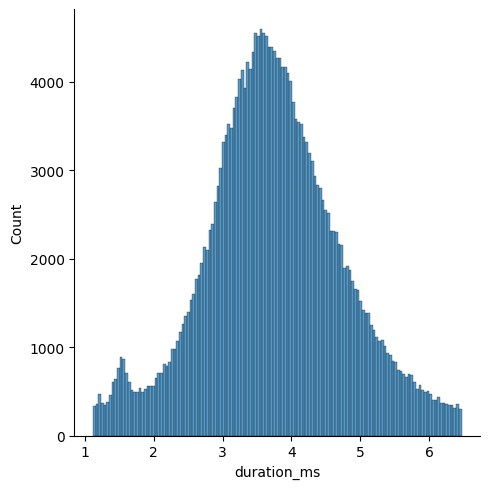

In [108]:
# IQR
Q1 = np.percentile(clean_df['duration_ms'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(clean_df['duration_ms'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.where(clean_df['duration_ms']>=upper)
print("Upper Bound:",upper)
print(upper_array)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.where(clean_df['duration_ms']<=lower)
print("“Lower Bound:”",lower)
print(lower_array)

print(clean_df.shape)
clean_df.drop(upper_array[0],inplace=True)
clean_df.drop(lower_array[0],inplace=True)
 
print("New Shape: ", clean_df.shape)
sns.displot(clean_df, x="duration_ms")

In [113]:
print(clean_df['duration_ms'].max(), clean_df['duration_ms'].min())

6.470533333333333 1.1151166666666668


In [115]:
# how many above 3.7
print(len(np.where(clean_df['duration_ms']>5)[0])/len(clean_df['duration_ms']))
# how many below 2.3
print(len(np.where(clean_df['duration_ms']<2.3)[0])/len(clean_df['duration_ms']))

0.10802421294033013
0.07264279553737862


I'd say cut anything over 5 (EDM) / under 2.5 (for radio, but tiktok might mess this up. depends on goal really. would probably end up cutting since you still want radio playing songs. let's see what is also in billboard first? be conservative with this cut)

In [122]:
print(clean_df.shape)
clean_df = clean_df[ (clean_df['duration_ms'] <= 5) & (clean_df['duration_ms'] >= 2.5)]
print(clean_df.shape)

(251601, 20)
(200040, 20)


## release_date 

In [123]:
clean_df['release_date']

0        2008-02-11
1        2020-03-13
3        2018-05-04
4        2018-05-04
6        2008-02-11
            ...    
265929   2020-03-03
265930   2020-03-20
265932   2020-10-21
265933   2020-09-02
265935   2015-07-01
Name: release_date, Length: 200040, dtype: datetime64[ns]

<Axes: xlabel='release_date'>

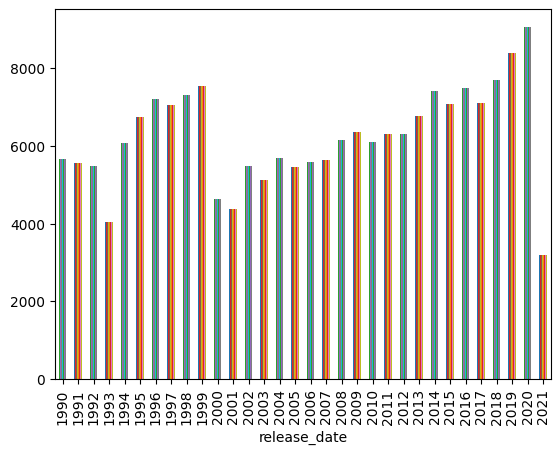

In [126]:
# Analyze by year
clean_df.groupby(clean_df["release_date"].dt.year).count().plot(kind="bar", legend=None)

In [127]:
# double check percentages are ok
print('90s', len(np.where(clean_df['release_date'].dt.year <=1999)[0])/len(clean_df['release_date']))
print('2000s', len(np.where((clean_df['release_date'].dt.year <=2010) & (clean_df['release_date'].dt.year >=2000))[0])/len(clean_df['release_date']))
print('2010s', len(np.where(clean_df['release_date'].dt.year >2010)[0])/len(clean_df['release_date']))

# extra
print('the best years', len(np.where((clean_df['release_date'].dt.year <=2016) & (clean_df['release_date'].dt.year >=2011))[0])/len(clean_df['release_date']))
print('the dead years', len(np.where(clean_df['release_date'].dt.year >=2017)[0])/len(clean_df['release_date']))

90s 0.31315236952609476
2000s 0.30291941611677664
2010s 0.3839282143571286
the best years 0.20680863827234552
the dead years 0.17711957608478304


Seems distrbuted just fine for now. I think there is a big difference between the early 2010s and late 2010 (can probably find articles that verify this, think coachella vs tiktok) if we want to check it out in our analysis (as an extra, or if the 2010s dont give any clear results of popularity)

Might want to even avoid 2021 if we don't then*
Might recheck this after we get the proper set tho, resample if needed.

## Danceability
 A value of 0.0 is least danceable and 1.0 is most danceable.

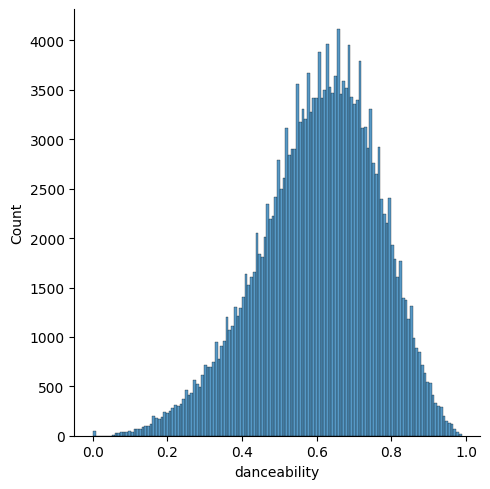

In [137]:
sns.displot(clean_df, x="danceability")

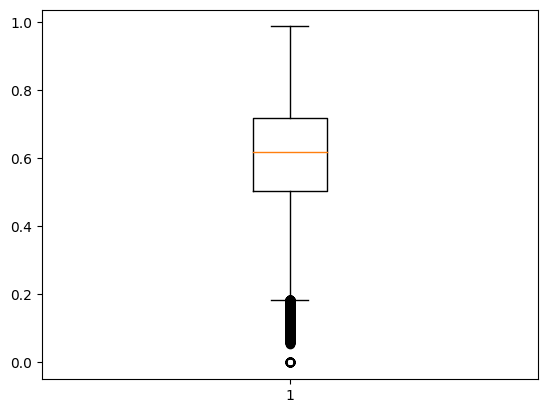

In [140]:
plt.boxplot(clean_df['danceability'])
plt.show()

In [142]:
clean_df[clean_df['danceability']<0.2]

,id,id_artists,name,artists,release_date,duration_ms,explicit,mode,time_signature,key,acousticness,instrumentalness,liveness,danceability,energy,loudness,speechiness,valence,tempo,popularity
30,4xgiFXUbqLpjFk9e3dUEMA,['1nIUhcKHnK6iyumRyoV68C'],"Ecstasy of Gold - From ""The Good, the Bad and ...",['Ennio Morricone'],2012-09-05,3.677550,0,0,4,9,0.71700,0.933000,0.681,0.1720,0.646000,-8.897,0.1690,0.12400,99.187,14
421,1bKQ48M9onID2kbSpRy8kK,['27T030eWyCQRmDyuvr1kxY'],Send Me An Angel,['Scorpions'],1990-01-01,4.555550,0,1,3,1,0.43400,0.000622,0.211,0.1530,0.417000,-11.587,0.0318,0.16600,80.870,71
466,6t7lMFHSifu9j8NPMNCv9T,"['5aIqB5nVVvmFsvSdExz408', '35pZsti1RSA5Zv98jA...","Orchestral Suite No. 3 in D Major, BWV 1068: I...","['Johann Sebastian Bach', 'Orpheus Chamber Orc...",1990-01-01,4.733333,0,1,4,2,0.93600,0.748000,0.416,0.0891,0.089400,-25.653,0.0420,0.07280,80.828,59
762,6gnvB7ejTWObv3d2xdCaL4,['64tNsm6TnZe2zpcMVMOoHL'],Sunshine,['Alice In Chains'],1990-08-01,4.760883,0,1,4,1,0.00297,0.000007,0.163,0.1780,0.787000,-7.008,0.0476,0.37000,76.932,48
776,3aHjVZ1IX6bU4VlCDF2HiM,['6iyQYs37mRXLW04Z9NOnNT'],Unchained Melody - Orchestral,['Maurice Jarre'],1990-01-01,3.995767,0,1,4,2,0.30800,0.883000,0.171,0.1300,0.146000,-18.899,0.0401,0.03990,97.569,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265656,0GWNh7kAj4Lq14UBxCPK5h,['7IgLHADCmO8pOUAqR9kTo3'],At Sunset,['Oriental Music Zone'],2021-01-16,3.547517,0,1,3,1,0.94600,0.929000,0.164,0.1920,0.145000,-23.367,0.0421,0.03950,113.445,1
265696,1GTkpSGeSs9guBTx1frmhu,['6ZyuwTFPiSQVgnjVB2264q'],Winter Story,['Eric Chiryoku'],2005-01-01,4.130667,0,1,3,2,0.95500,0.424000,0.352,0.1520,0.287000,-11.674,0.0360,0.29300,82.020,22
265812,59zkrTH8hlMZ9ZywRT4wr7,['77r2kVMvI1SMhLwDqyM7vw'],Hasbi Rabbi,['Ustaz Hasnul'],2014-01-01,2.797117,0,0,3,5,0.95100,0.000000,0.331,0.1990,0.259000,-10.024,0.0402,0.19800,71.312,34
265831,7EqliudQ8vxJbZrD5x4URl,['1O7bUkov2v71fDS60GOfMD'],"Warmth (No Fade, Seamless Loop)",['White Noise Therapy'],2015-09-30,3.000000,0,0,0,7,0.69700,0.382000,0.111,0.0000,0.000515,-26.041,0.0000,0.00000,0.000,47


Keeping since some songs are just not danceable? not sure if this is like super outlier?

In [143]:
#df = df.reset_index(drop=True)

## energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

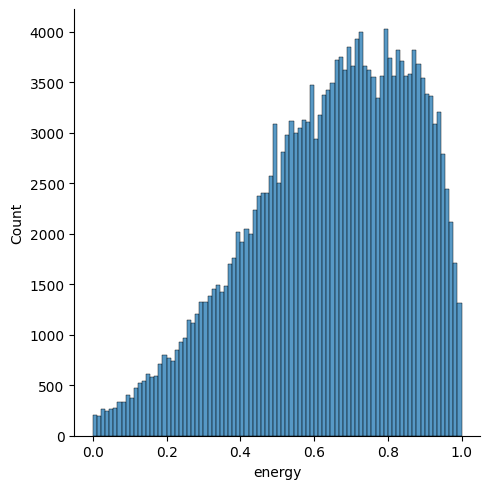

In [144]:
sns.displot(clean_df, x="energy")

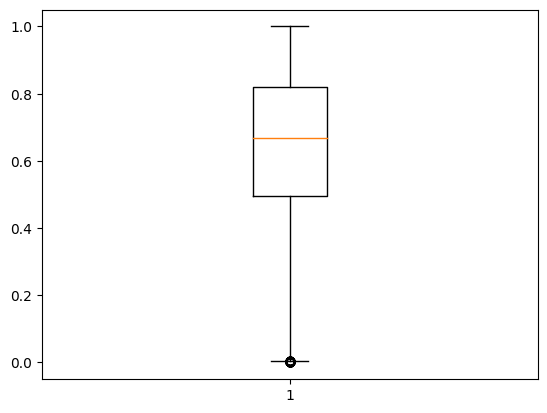

In [145]:
plt.boxplot(clean_df['energy'])
plt.show()

## loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

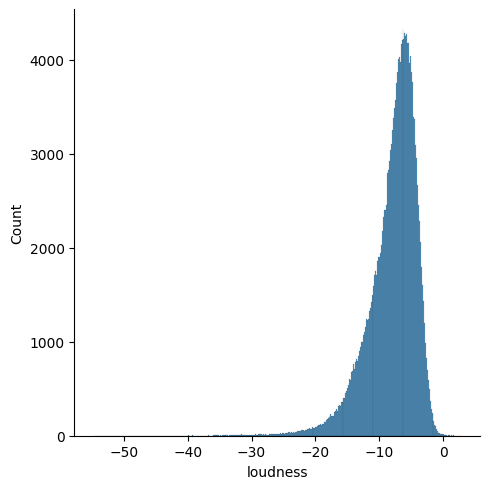

In [147]:
sns.displot(clean_df, x="loudness")

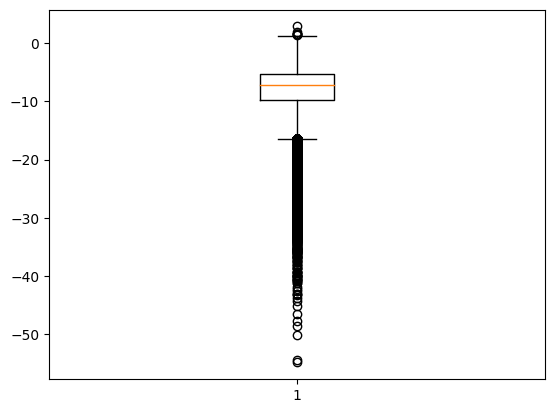

In [148]:
plt.boxplot(clean_df['loudness'])
plt.show()

## All together now

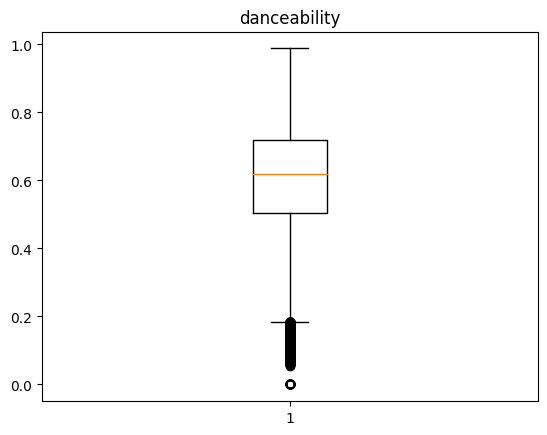

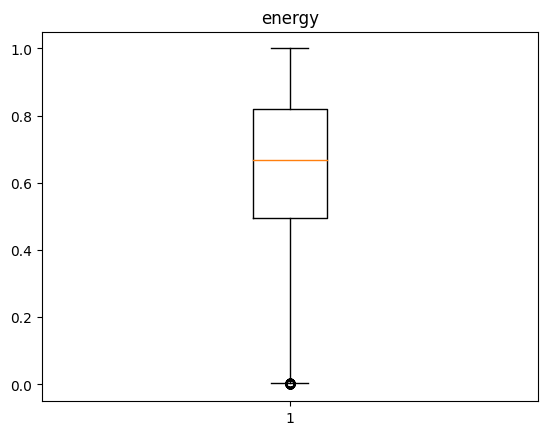

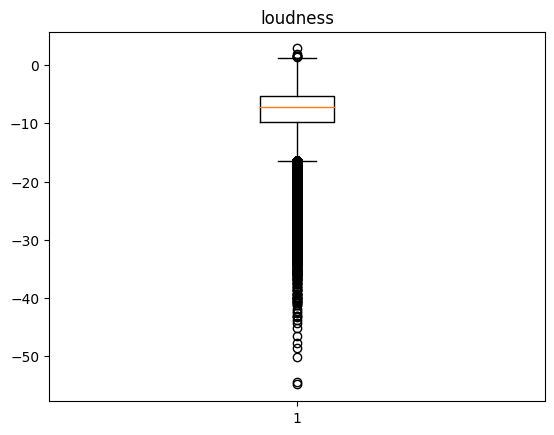

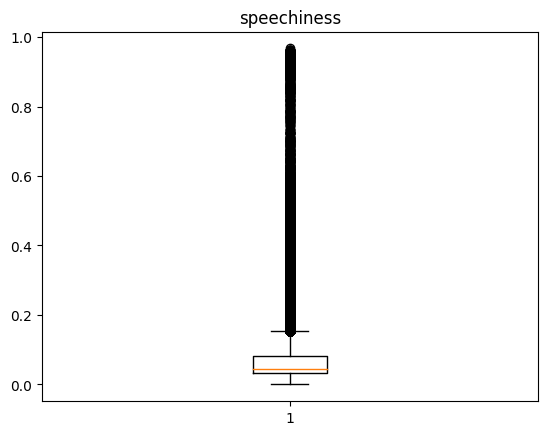

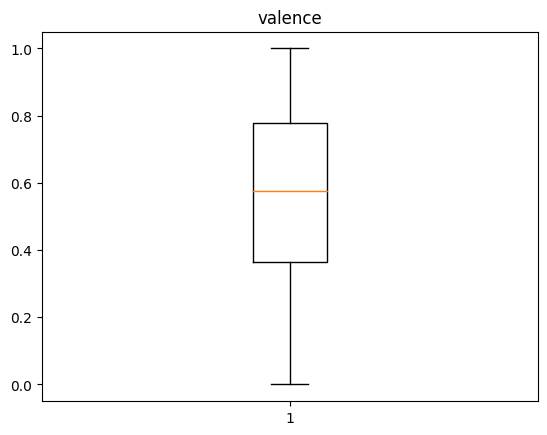

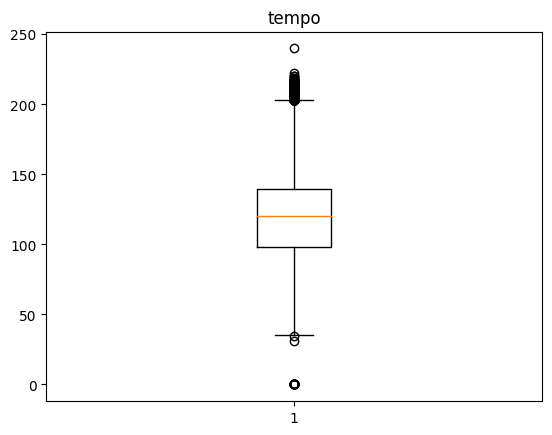

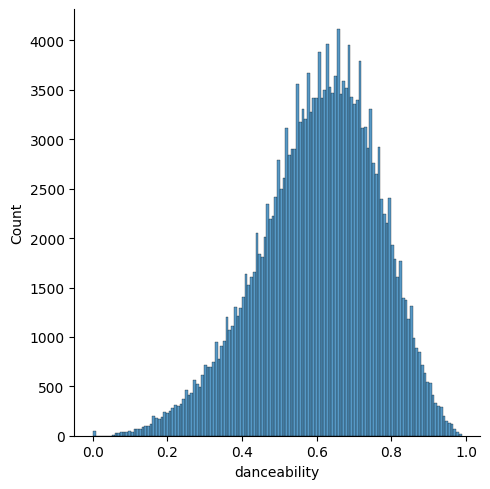

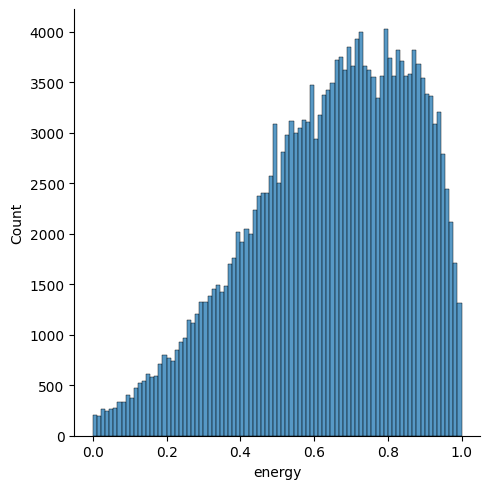

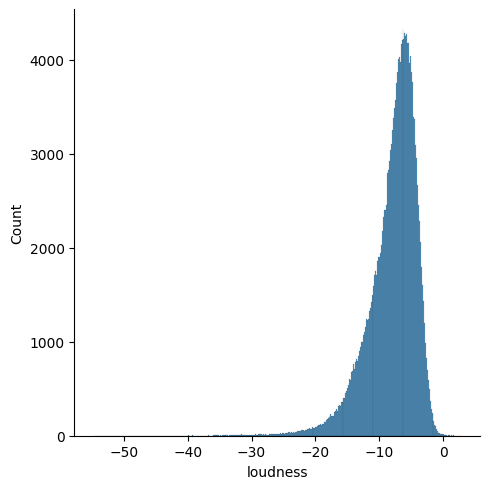

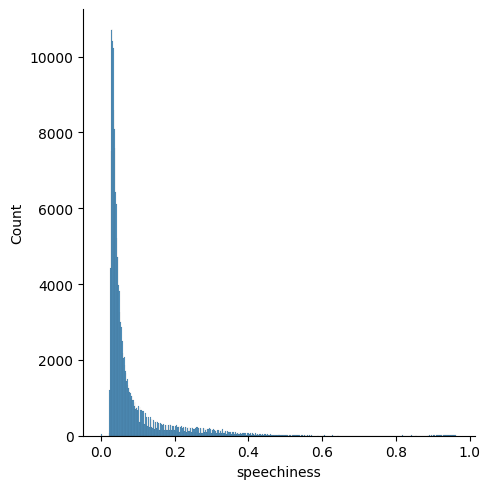

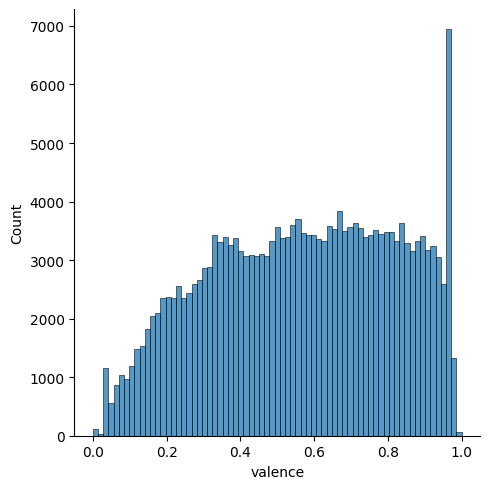

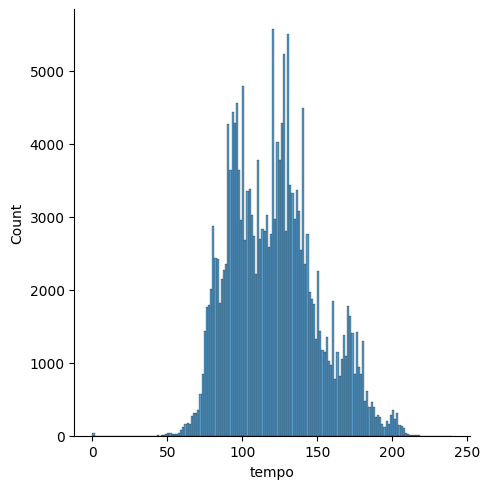

In [151]:
important_attr = ['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'tempo']

for item in important_attr:
    plt.title(item)
    plt.boxplot(clean_df[item])  
    plt.show()

for item in important_attr:
    sns.displot(clean_df, x=item)

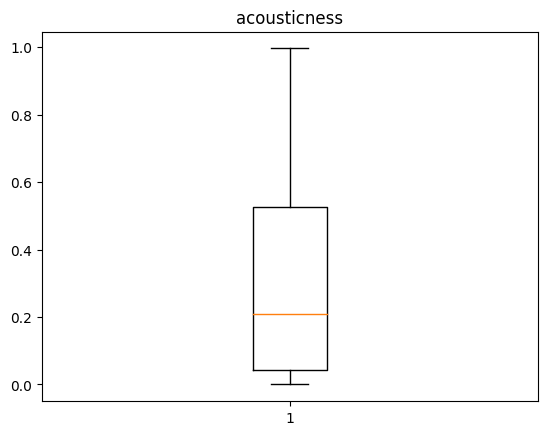

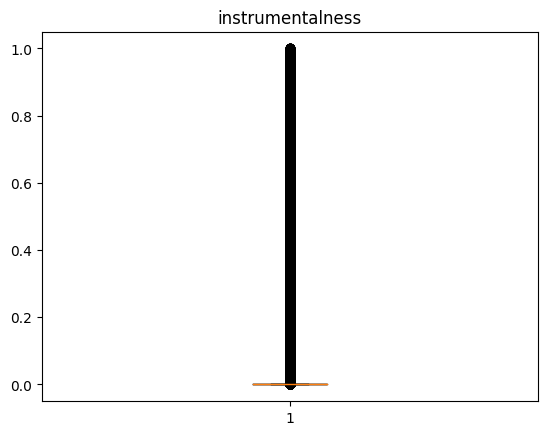

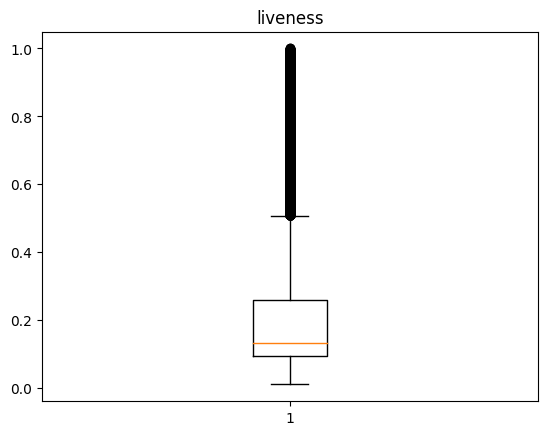

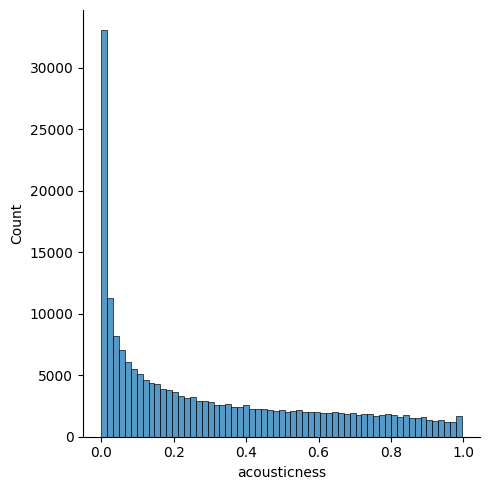

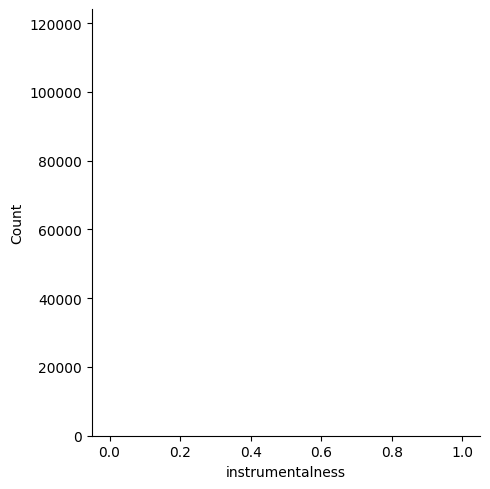

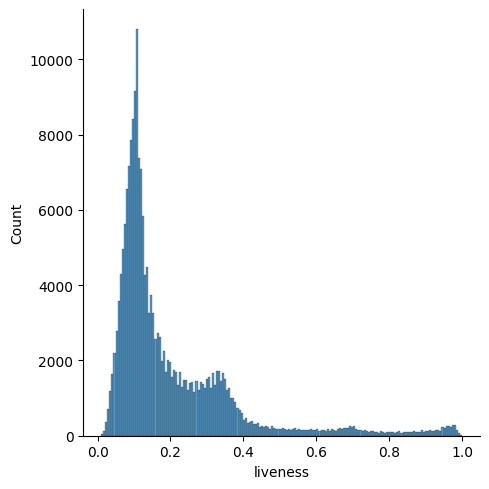

In [153]:
other_attr = ['acousticness', 'instrumentalness', 'liveness']

for item in other_attr:
    plt.title(item)
    plt.boxplot(clean_df[item])  
    plt.show()

for item in other_attr:
    sns.displot(clean_df, x=item)

## Speechines
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

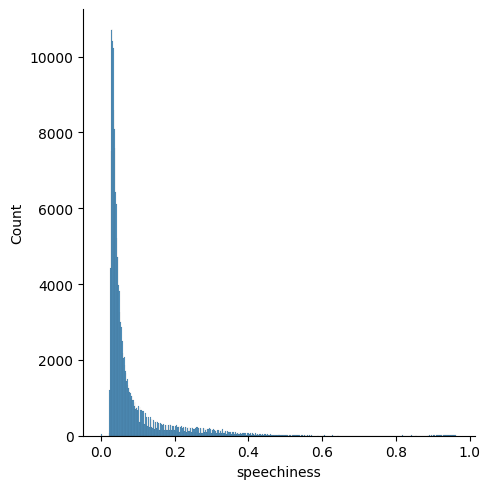

In [154]:
sns.displot(clean_df, x='speechiness')

In [156]:
clean_df[clean_df['speechiness']>0.9]

,id,id_artists,name,artists,release_date,duration_ms,explicit,mode,time_signature,key,acousticness,instrumentalness,liveness,danceability,energy,loudness,speechiness,valence,tempo,popularity
6323,4Vp7PokYymcoThbUoA8sQX,['1HwM5zlC5qNWhJtM00yXzG'],Prayer - Skit,['DMX'],1998-05-01,2.535550,1,0,4,0,0.469,0.000000,0.460,0.717,0.186,-20.016,0.939,0.213,102.082,55
11058,0etMFEwiQixrUqeLciQzcv,['0QbGBnY8qUpzqAhGPKJmF2'],Good Young Years,"[""Patrice O'Neal""]",2015-12-04,4.447900,1,1,5,6,0.966,0.000029,0.471,0.509,0.796,-8.128,0.902,0.604,96.618,18
12131,1ctcaaNMwC5yos7QnaoMXY,['45qKirPplVcz1no4oz1Ddj'],Married Eleven Years (Jfl 2006),['Comedian Bob Marley'],2018-11-21,3.961183,0,1,3,1,0.938,0.000000,0.937,0.538,0.744,-16.054,0.958,0.135,87.034,2
12595,0jw88oIJ4amj1GWvuu4h0b,['4kcdiauFup6jwVT2O2zXqG'],Married 12 Years (Jfl 2007),['John Moloney'],2018-10-15,4.637417,0,1,1,0,0.874,0.000000,0.821,0.591,0.679,-22.130,0.913,0.116,111.311,5
13284,76eIiQSsnFKUUQPOnmBqFt,['09UxXSXASuJcfJEGw2a5Sw'],Yearly Physical (Jfl 2008),['Bruce Bruce'],2018-11-14,3.864967,0,1,4,1,0.937,0.000000,0.805,0.559,0.645,-15.487,0.955,0.433,80.790,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263395,7o1pqrRAXy74XQ5BH1m4eH,['1V95p8oWGxXlpcFRYqXV3w'],Bamse och Sjrvarna - Del.6,['Bamse'],2009-01-01,4.186933,0,1,4,3,0.918,0.000000,0.178,0.728,0.411,-14.265,0.942,0.335,114.132,34
263398,0SQ21hh6dRqGQjJvdrqpT6,['1V95p8oWGxXlpcFRYqXV3w'],Skalman glmde ngon,['Bamse'],2009-01-01,4.426000,0,1,3,1,0.872,0.000000,0.140,0.640,0.385,-11.481,0.946,0.571,85.981,34
263401,7kneBuGnCYK6woxJnc0RAn,['1V95p8oWGxXlpcFRYqXV3w'],Teddy gr vilse - Del.2,['Bamse'],2009-01-01,4.312500,0,1,3,1,0.932,0.000000,0.125,0.693,0.361,-10.874,0.940,0.495,80.849,34
263402,0kA4NEa4kQGDSkKm0eXhmh,['1V95p8oWGxXlpcFRYqXV3w'],Bamse och Sjrvarna - Del.7,['Bamse'],2009-01-01,3.466767,0,0,3,9,0.926,0.000000,0.679,0.717,0.507,-11.616,0.940,0.371,115.369,34


Iffy to cut these bc of rap songs. maybe at .95 it works

## Instrumentalness

In [157]:
clean_df[clean_df['instrumentalness']>0.9]

,id,id_artists,name,artists,release_date,duration_ms,explicit,mode,time_signature,key,acousticness,instrumentalness,liveness,danceability,energy,loudness,speechiness,valence,tempo,popularity
30,4xgiFXUbqLpjFk9e3dUEMA,['1nIUhcKHnK6iyumRyoV68C'],"Ecstasy of Gold - From ""The Good, the Bad and ...",['Ennio Morricone'],2012-09-05,3.677550,0,0,4,9,0.717,0.933,0.6810,0.172,0.6460,-8.897,0.1690,0.12400,99.187,14
65,4WybrSagfGRf79Wfn7EW0w,['03hfAxVdAWj7kxDnSG0fLD'],Spring Is Nearly Here,['The Shadows'],1991-01-01,3.054883,0,1,3,0,0.959,0.902,0.1360,0.351,0.2910,-12.580,0.0276,0.34400,105.337,9
164,0LOJBeEWjFY1Uo924xVj7A,['1nIUhcKHnK6iyumRyoV68C'],"Theme - From ''The Battle of Algiers'', 1966",['Ennio Morricone'],2012-09-05,2.545117,0,1,4,9,0.641,0.947,0.0874,0.537,0.7940,-10.669,0.0662,0.56000,123.538,4
188,68Ty1JVjb8OZepzlREds6b,['03hfAxVdAWj7kxDnSG0fLD'],Genie with the Light Brown Lamp,['The Shadows'],1991-01-01,2.672217,0,1,4,0,0.234,0.950,0.0335,0.402,0.7640,-10.964,0.0305,0.96200,88.900,2
205,1d92AryQ3MLo1HMojGetZM,['03hfAxVdAWj7kxDnSG0fLD'],Nivram,['The Shadows'],1991-01-01,3.364883,0,1,4,2,0.916,0.963,0.0893,0.693,0.1080,-20.296,0.0493,0.57400,129.090,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265840,3zLTPuucd3e6TxZnu2dlVS,"['2wOqMjp9TyABvtHdOSOTUS', '0japPUWMmW3gxqjSB1...","Bagatelle No. 25 in A Minor, WoO 59 ""Fr Elise""","['Ludwig van Beethoven', 'Igor Levit']",2015-01-01,3.534450,0,0,3,9,0.987,0.911,0.1020,0.289,0.0306,-30.790,0.0446,0.11800,125.610,48
265859,2fIVdzd4JW4HnwzqrvCysf,['4SnnTtHKeeWxZ8FxzMv435'],Let Her Go,['David Fischbein'],2016-10-07,3.212117,0,1,4,8,0.989,0.944,0.1600,0.257,0.0317,-23.030,0.0424,0.26800,205.506,60
265864,3s4zQCLsI9YG2XSw7fmkeO,['5fnKsV4JHpqMoKyhKjQmj6'],Brahms' Lullaby,['Eugene Lopin'],2017-10-25,3.103617,0,1,3,3,0.909,0.959,0.2390,0.540,0.2740,-11.902,0.0358,0.35300,79.973,44
265871,3LMvyfd6x8OVW6VvYDFlNB,['5SGuAyOqyIejlY3Lxv7CjX'],Lush Rain,['Rain Hard'],2017-05-05,3.412500,0,0,4,3,0.158,0.903,0.9490,0.168,0.9980,-21.382,0.0566,0.00001,123.148,57


Deal with soundtracks? but also classical music rip, cant delete <3 unless goal changes (or don't include billboard anymore)

## liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

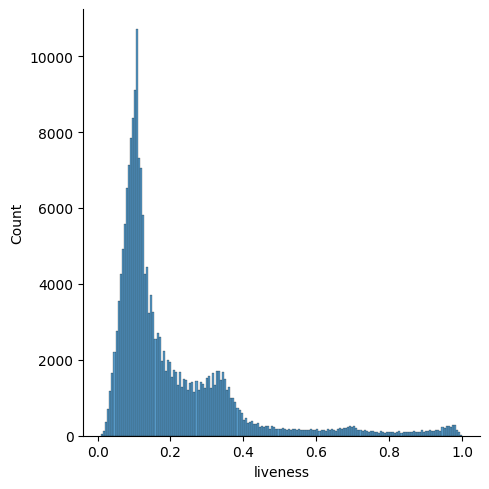

In [65]:
sns.displot(clean_df, x='liveness')

In [158]:
clean_df[clean_df['liveness']>0.9]

,id,id_artists,name,artists,release_date,duration_ms,explicit,mode,time_signature,key,acousticness,instrumentalness,liveness,danceability,energy,loudness,speechiness,valence,tempo,popularity
3,1hx7X9cMXHWJjknb9O6Ava,['1Mxqyy3pSjf8kZZL4QVxS0'],The September Of My Years - Live At The Sands ...,['Frank Sinatra'],2018-05-04,3.122217,0,1,3,7,0.88700,0.000000,0.904,0.319,0.201,-17.796,0.0623,0.23900,117.153,26
9,67BBzbF6t4ejG7HwVjQ4Tm,['5cyeaYQ80Wkqvxx4HcY0jo'],"Love For Sale - Live At Chez Club, Hollywood/1...",['Buddy Rich Big Band'],1997-01-01,4.859550,0,0,4,5,0.44500,0.235000,0.958,0.409,0.839,-7.695,0.2000,0.55700,112.624,18
26,6l82JF2bHWDnbdSp7mw5dP,"['1Mxqyy3pSjf8kZZL4QVxS0', '2jFZlvIea42ZvcCw4O...","It Was A Very Good Year - Live At The Sands, L...","['Frank Sinatra', 'Count Basie']",2006-11-07,3.854450,0,1,1,10,0.87700,0.000004,0.959,0.329,0.224,-17.672,0.0737,0.23600,80.532,14
28,6bgnQlDQKgni9fH7mEQ1sC,"['1Mxqyy3pSjf8kZZL4QVxS0', '2jFZlvIea42ZvcCw4O...","The September Of My Years - Live At The Sands,...","['Frank Sinatra', 'Count Basie']",2006-11-07,3.066000,0,1,1,7,0.88600,0.000001,0.909,0.292,0.220,-16.917,0.0431,0.22100,108.978,13
101,4tAY3clWeIHaGWcKwl860R,['5UaXeIdkgIbWPwnClfQIU5'],Olen hautausmaa - Live,['Hector'],1992-01-01,2.562217,0,1,4,2,0.33000,0.000000,0.930,0.441,0.682,-12.390,0.0336,0.86400,141.795,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264170,18lJtRd5zSqezlKjD5treG,['3H7Ez7cwaYw4L3ELy4v3Lc'],Nu kan du f mig s ltt (Live),['Håkan Hellström'],2014-12-12,4.943117,0,1,4,7,0.90300,0.000000,0.972,0.166,0.369,-16.221,0.0516,0.34800,69.835,37
264783,1VBUOK5nkeNgKVDpfd0PPW,['6qbReoCHJ3BPXU47VxeajP'],Hng med p party,['Titanix'],2018-07-13,4.128217,0,0,4,6,0.00464,0.000002,0.936,0.621,0.940,-5.816,0.0585,0.78500,141.990,45
265625,7Dyk3PpDhJPkxpTGGxiu6X,"['7cvnCTBvMm6OvTutfCpxjL', '3oZR0tAkfIn1YmLe1f...",Lord Reign in Me,"['Vineyard Worship', 'Brenton Brown']",1998-07-11,3.955350,0,1,4,0,0.24600,0.002690,0.966,0.420,0.884,-5.014,0.0381,0.50000,91.124,33
265716,2H3KAEoeYJnngTHY6PGK8i,['488v7rQzthLNK22r0UvMie'],Be My Lover,['La Bouche'],2007-01-01,4.014450,0,0,4,1,0.00283,0.000002,0.951,0.658,0.963,-3.283,0.0326,0.79300,134.798,23


# Categorical

## explicit

Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).

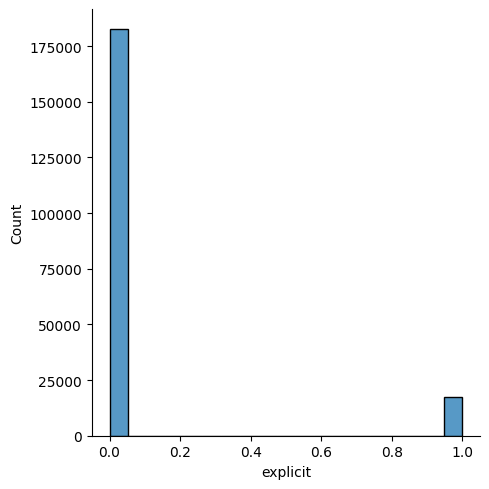

In [ ]:
sns.displot(clean_df, x="explicit")

## key

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
Example value: 9
Range: -1 - 11

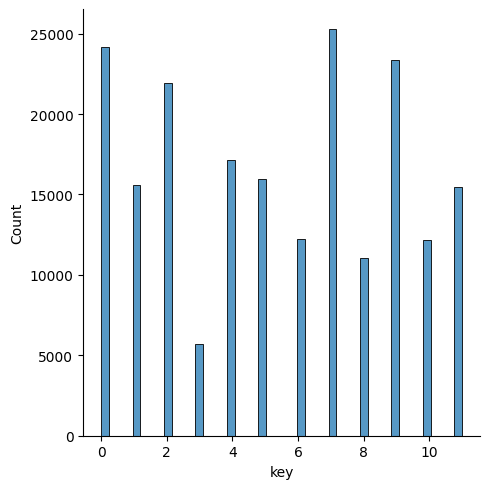

In [ ]:
sns.displot(clean_df, x="key")

## mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

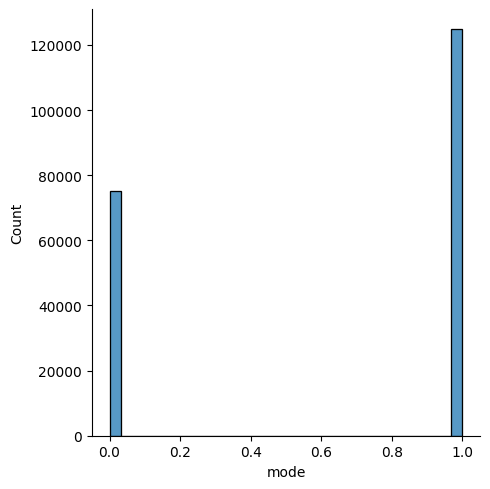

In [ ]:
sns.displot(clean_df, x="mode")

## time_signature

An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
Example value: 4
Range: 3 - 7

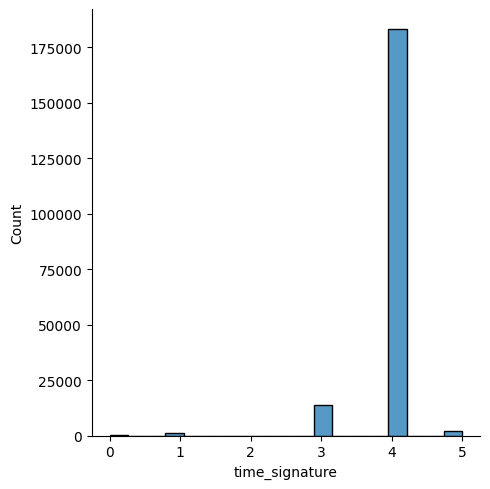

In [ ]:
sns.displot(clean_df, x="time_signature")

In [ ]:
clean_df[clean_df['time_signature']==0].head()

,id,id_artists,name,artists,release_date,duration_ms,explicit,mode,time_signature,key,acousticness,instrumentalness,liveness,danceability,energy,loudness,speechiness,valence,tempo,popularity
16317,7dTyZl4cBRKnPBeq1fdrHY,['5nSGBmlgUdqWNExnOX8VtV'],White Noise,['Rain Sounds'],2012-05-07,4.000000,0,0,0,4,0.119,0.771,0.9680,0.0,0.601000,-13.753,0.0,0.0,0.0,64
18908,3hJJOnsafnWFrhWDwhvZSy,['3rolEAXFOTW33tkUA2VOuo'],Box Fan Rest Sound,['Fan Sounds'],2016-11-11,3.712667,0,1,0,4,0.138,0.145,0.1120,0.0,0.000020,-25.213,0.0,0.0,0.0,69
20188,129ldjjvnFfA7Ygc8ktYnh,['3T9Rn6sxhCylmpTyWCuu1f'],Soft Brown Noise,['High Altitude Samples'],2018-11-15,2.666717,0,1,0,5,0.394,1.000,0.1110,0.0,0.001480,-31.839,0.0,0.0,0.0,76
21764,3YYni1jodOmekz697cuwhl,"['4XbnhifKeOnyfTsCInrQsX', '6rRqxCKHpl9C5Imf2u...",Its Been A Year,"['No Spirit', 'Kyle McEvoy']",2020-03-18,2.717950,0,1,0,0,0.601,0.821,0.0525,0.0,0.268000,-12.754,0.0,0.0,0.0,25
32516,3AFEx7f9qxc6U59s27Tp1V,['6jKgLzBdINpIrcinbmi7hI'],White Noise Crashing Waves,['Bruce Brus'],2019-08-09,2.800000,0,0,0,0,0.862,0.977,0.1620,0.0,0.000431,-14.105,0.0,0.0,0.0,72


In [ ]:
clean_df[clean_df['time_signature']==1].head()

,id,id_artists,name,artists,release_date,duration_ms,explicit,mode,time_signature,key,acousticness,instrumentalness,liveness,danceability,energy,loudness,speechiness,valence,tempo,popularity
26,6l82JF2bHWDnbdSp7mw5dP,"['1Mxqyy3pSjf8kZZL4QVxS0', '2jFZlvIea42ZvcCw4O...","It Was A Very Good Year - Live At The Sands, L...","['Frank Sinatra', 'Count Basie']",2006-11-07,3.85445,0,1,1,10,0.8770,0.000004,0.9590,0.329,0.224,-17.672,0.0737,0.236,80.532,14
28,6bgnQlDQKgni9fH7mEQ1sC,"['1Mxqyy3pSjf8kZZL4QVxS0', '2jFZlvIea42ZvcCw4O...","The September Of My Years - Live At The Sands,...","['Frank Sinatra', 'Count Basie']",2006-11-07,3.06600,0,1,1,7,0.8860,0.000001,0.9090,0.292,0.220,-16.917,0.0431,0.221,108.978,13
223,4isHNeD2knqlQ850CykFMq,['03hfAxVdAWj7kxDnSG0fLD'],"Big ""B""",['The Shadows'],1991-01-01,3.68555,0,1,1,8,0.2870,0.878000,0.0836,0.372,0.697,-9.838,0.0395,0.556,163.248,1
288,061wPjsBtaMBfWbUA1Ev36,['0gWNSMYCSHF4wxIs1XTSDh'],For Loving You,['Bill Anderson'],2011-06-13,2.77800,0,1,1,3,0.8690,0.000016,0.3420,0.426,0.185,-20.106,0.0476,0.441,122.964,0
522,4xVZmLJtBTedcXbDB3qYdX,['7An4yvF7hDYDolN4m5zKBp'],(En) El Sptimo Da - Remasterizado 2007,['Soda Stereo'],1990-10-09,4.38800,0,1,1,4,0.0018,0.000578,0.1700,0.582,0.864,-6.356,0.0260,0.890,106.191,56


Come back to this, but estimated so doesn't matter. like 2k.
https://github.com/spotify/web-api/issues/379 

# Other tricks

In [ ]:
corr = clean_df.corr()

/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_30753/1883255254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_df.corr()


<Axes: >

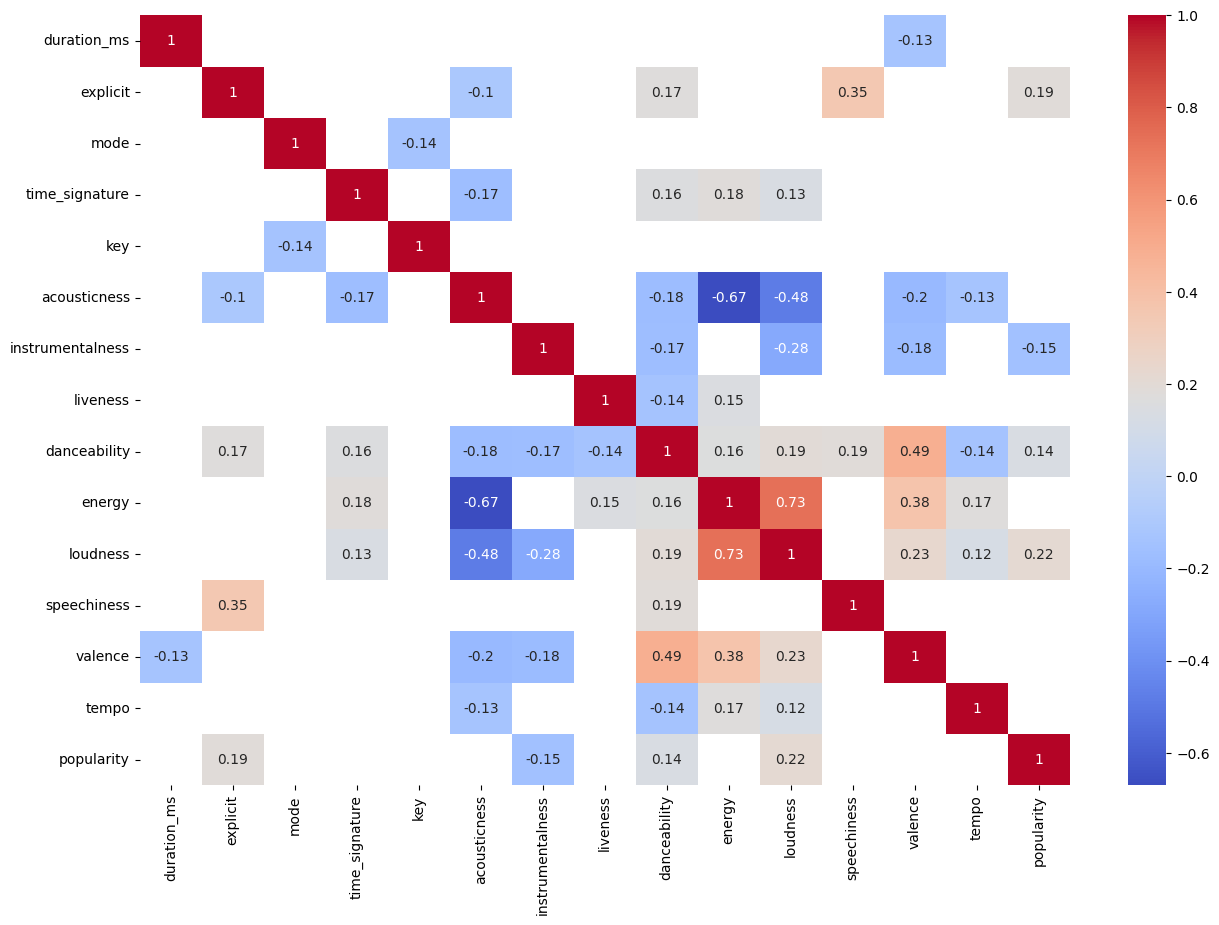

In [ ]:
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')

/var/folders/25/15h8p44s3_z09_s99_nxm3480000gn/T/ipykernel_30753/2486731982.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(),annot = True)


<Axes: >

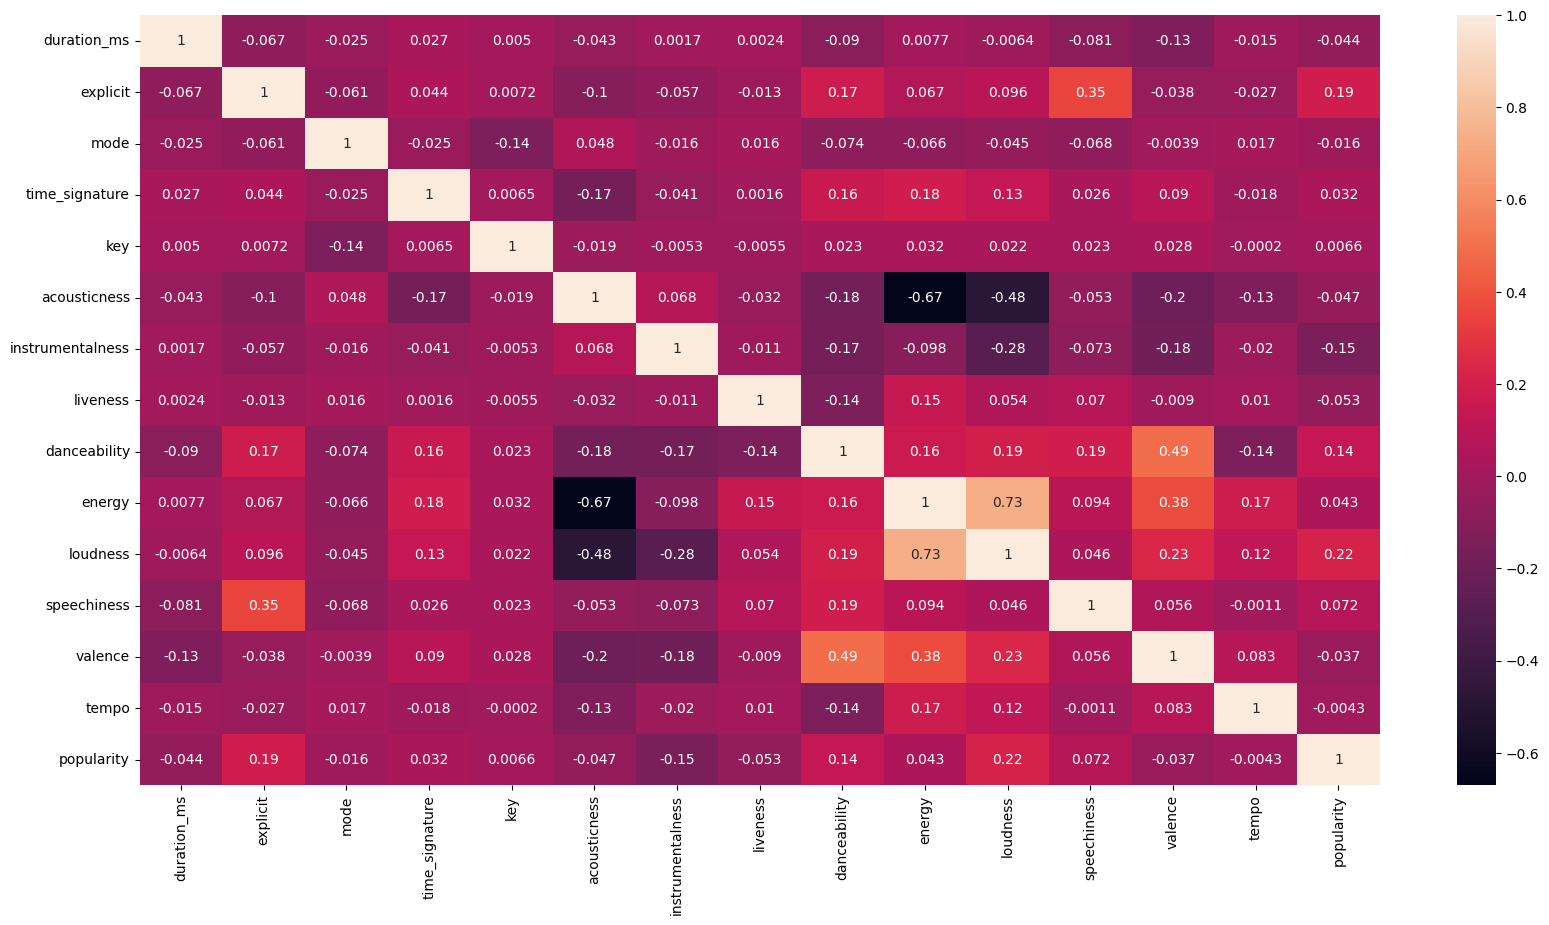

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(clean_df.corr(),annot = True)

Find api descr here
https://developer.spotify.com/documentation/web-api/reference/get-audio-features